# Traffic Sign Classification

In [1]:
import tensorflow as tf
import tensorflow.keras as kr
import tensorflow.keras.layers as layers

## Collecting data

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets list -s gtsrb-german-traffic-sign

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          87350        988  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11425        255  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            402          9  0.75    

In [4]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 608M/612M [00:14<00:00, 44.8MB/s]
100% 612M/612M [00:14<00:00, 44.3MB/s]


## Preparing data

In [5]:
import zipfile
data=zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip')
data.extractall()
data.close()

In [6]:
!rm -rf test
!rm -rf train

In [7]:
!rm -rf Meta

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

## Data Preparation

In [12]:
# Check the dimensions of all image
import os
dim1=[]
dim2=[]

for i in range(43):
  path=os.path.join('/content/Train',str(i))
  for image in os.listdir(path):
    arr=img.imread(os.path.join(path,image))
    dim1.append(arr.shape[0])
    dim2.append(arr.shape[1])

In [13]:
import numpy as np
print(f'Mean dimension : {np.mean(dim1)},{np.mean(dim2)}')

Mean dimension : 50.328929582493814,50.83587951745773


In [15]:
# Resizing every images
images=[]
labels=[]
for i in range(43):
  path=os.path.join('/content/Train',str(i))
  for image in os.listdir(path):
    arr=Image.open(os.path.join(path,image))
    arr=arr.resize((50,50))
    arr=np.array(arr)
    images.append(arr)
    labels.append(i)

In [16]:
images=np.array(images)
images=images/255

In [17]:
labels=np.array(labels)
labels.shape

(39209,)

In [18]:
images.shape

(39209, 50, 50, 3)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=43)

In [20]:
import tensorflow as tf
import tensorflow.keras as kr
import tensorflow.keras.layers as layers

In [26]:
y_train=kr.utils.to_categorical(y_train)
y_test=kr.utils.to_categorical(y_test)

In [27]:
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)',
              'Speed limit (60km/h)', 'Speed limit (70km/h)','Speed limit (80km/h)',
              'End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution',
              'Dangerous curve to the left', 'Dangerous curve to the right','Double curve',
              'Bumpy road','Slippery qoad','Road narrows on the right', 'Road work','Traffic signals',
              'Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead',
              'Turn left ahead', 'Ahead only','Go straight or right','Go straight or left',
              'Keep right','Keep left','Roundabout mandatory', 'End of no passing',
              'End of no passing by vechiles over 3.5 metric']
len(all_labels)

43

## Creating model

In [30]:
model=kr.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), input_shape=x_train.shape[1:], padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(43,activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=kr.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [36]:
es=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [37]:
his=model.fit(x_train,y_train,epochs=50, batch_size=128, validation_data=(x_test,y_test), verbose=2,
              callbacks=[es])

Epoch 1/50
246/246 - 5s - loss: 0.1216 - accuracy: 0.9605 - val_loss: 0.0213 - val_accuracy: 0.9952 - 5s/epoch - 20ms/step
Epoch 2/50
246/246 - 5s - loss: 0.1138 - accuracy: 0.9629 - val_loss: 0.0213 - val_accuracy: 0.9955 - 5s/epoch - 20ms/step
Epoch 3/50
246/246 - 4s - loss: 0.1107 - accuracy: 0.9632 - val_loss: 0.0232 - val_accuracy: 0.9945 - 4s/epoch - 18ms/step
Epoch 4/50
246/246 - 4s - loss: 0.1114 - accuracy: 0.9638 - val_loss: 0.0230 - val_accuracy: 0.9952 - 4s/epoch - 18ms/step


In [38]:

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

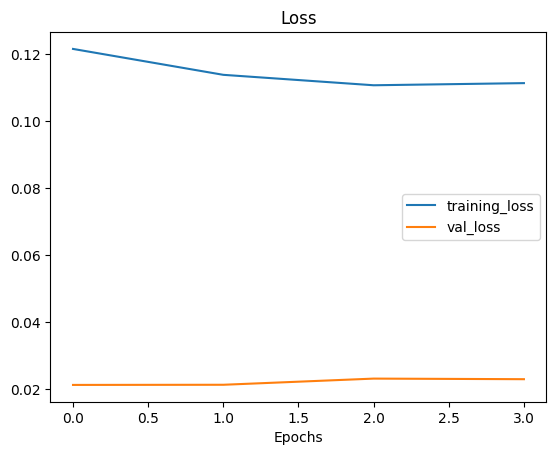

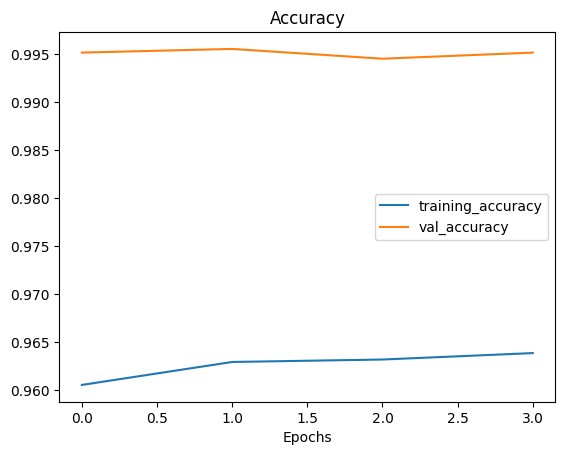

In [39]:
plot_loss_curves(his)

In [47]:
def load_and_prep_image(filename, img_shape=50, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img


In [48]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 254ms/step


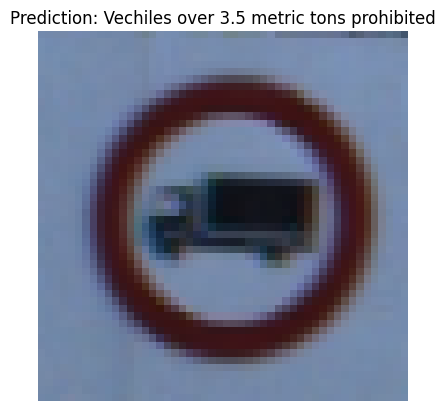

In [49]:
pred_and_plot(model,'Test/00000.png',all_labels)